# Working with Data

One of the most important aspects of designing any machine learning system is to __understand your data__. In this notebook, we're going to load and visualize some very basic datasets so that you understand some of the various tools available to you in Python for working with data. You should __always try to visualize your data__ before you use it in any type of algorithm. First we will look at a random dataset, and then we'll use `sklearn` to study the Iris dataset and other famous datasets.

_Note: some code segments have TODO comments in them. These comments are optional exercises for you to modify the code in a useful way, however they are not meant to be restrictive. Feel free to modify the code in this notebook any way you like; it's a great way to practice your coding skills._

## Getting Started

You should have your own Anaconda virtual environment with all of the necessary Python modules installed. You can check by trying to import them:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import skimage.io
import sklearn
import sklearn.datasets

## Generating Random Data

Let's begin by generating a random dataset of 2-D data points.

In [2]:
# you can set a random seed to get "reproducible" randomness
np.random.seed(912)

# define a function to generate random data
def random_data(n_samples):
    """
    Generates random data in two dimensions.
    Returns a (n_samples, 2) numpy array.
    """
    # define the parameters (mean, covariance) of a normal distribution
    mean = [0.5, 0.5]
    cov = [[1,0], [0,100]]

    # generate n_samples of 2D data
    X = np.random.multivariate_normal(mean, cov, size=n_samples)

    return X 

Let's see what this data looks like. We'll start small and draw 50 samples from our function. 

In [3]:
X = random_data(50)
print('Dataset shape: (%d, %d)' % X.shape)
print(X)

Dataset shape: (50, 2)
[[  2.38844992  -1.63950263]
 [  0.75605384  -6.22371025]
 [  0.63425466 -10.76118142]
 [  0.69506623 -11.85747388]
 [  1.4661755   -1.59446729]
 [ -0.62393265 -13.85770098]
 [  1.62546485 -19.3475291 ]
 [  0.84441938 -11.51257881]
 [  0.58695958   3.81889117]
 [  0.18471083   4.21149859]
 [ -0.34133745  17.16222984]
 [  1.17245178 -16.10105392]
 [ -0.20831197  -8.12361548]
 [  1.65301519  10.24355616]
 [ -0.7264035   -1.56433337]
 [  0.55543475   5.40763484]
 [  0.79927505   7.61554737]
 [ -0.04826969  12.51505776]
 [  1.25228296  -4.23389556]
 [  0.72094623  -5.96626395]
 [  0.44535496  -0.24928131]
 [ -0.30041991   0.8397796 ]
 [ -0.19816191  -8.85715815]
 [ -0.41777507   7.58831987]
 [ -0.51505484  -9.34385444]
 [  1.11251338  16.97635784]
 [  0.46186661 -12.42881378]
 [ -0.93865738  -9.81859131]
 [  0.67197315   2.75447372]
 [  2.05170888  14.12672741]
 [  1.04201463   1.74698215]
 [ -0.30276545  -0.64047042]
 [  0.28229565   3.54920444]
 [  0.957881     1.3

Awesome! Now we have some data to play with.

## Plotting Univariate Data

Let's try to generate some more samples and then plot them.

In [4]:
# generate 1000 random samples
X = random_data(1000)

One of the most basic aspects of a dataset is its __dimensionality__. For example, if a dataset is 2-dimensional, it means that the dataset has two variables that are influencing the outcomes. These dimensions are also called the __features__ of a dataset. In this case, `X` is our dataset, and it has two features (we'll call them "X_1" and "X_2"). Let's plot each of these features individually using `matplotlib`:

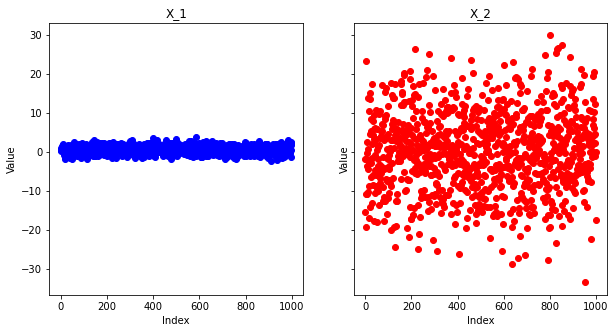

In [5]:
# generate indices for X
idx = range(len(X))

# initialize a 2x1 figure for plotting
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot X_1 on the left
ax1.scatter(idx, X[:, 0], c='b')
ax1.set_title('X_1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

# plot X_2 on the right
ax2.scatter(idx, X[:, 1], c='r')
ax2.set_title('X_2')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')

# display the plot
plt.show()

Here we've simply plotted all of the samples in a line, separately for each feature. This visualization is fairly straightforward, but it's not how we typically look at data of this type. That is, since this dataset consists of many independent samples, a better way to visualize this data is to use a __histogram__. The `matplotlib` library has a histogram function called `plt.hist()`, but here we're going to use another library called `seaborn`, which provides some fancier plotting functions on top of `matplotlib`.

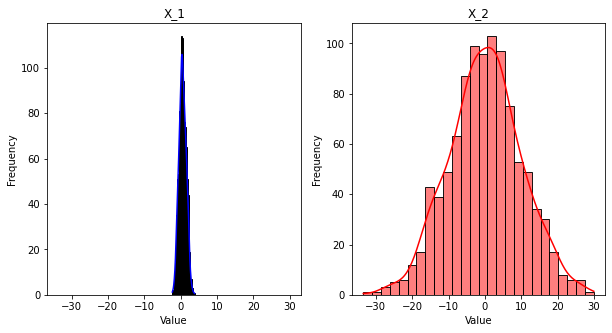

In [6]:
# initialize a 2x1 figure for plotting
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# plot histogram of X_1 on the left
sns.histplot(X[:, 0], kde=True, color='b', ax=ax1)
ax1.set_title('X_1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# plot histogram of X_2 on the right
sns.histplot(X[:, 1], kde=True, color='r', ax=ax2)
ax2.set_title('X_2')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# display the plot
plt.show()

Now we can see more clearly what the differences are between X_1 and X_2. Both features are centered at 0 (to be exact, they are centered at 0.5). However, X_1 spreads out _very little_ while X_2 spreads out _a lot_. We typically use these two properties to broadly describe data: the center of the data is called the __mean__ and the spread is called the __variance__.

Furthermore, both X_1 and X_2 look like "bell curves". As it turns out, each of these features were generated using a __Gaussian distribution__ (__normal distribution__):

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

The Gaussian distribution is used in many fields because it occurs so frequently in nature, and because any Gaussian distribution can be described by a mean and a variance. For example, we can describe how X_1 and X_2 were generated:

$$x_1 \sim \mathcal{N}(0.5, 1)$$
$$x_2 \sim \mathcal{N}(0.5, 100)$$

Now for a software engineering exercise: let's combine the data generation and visualization into a single function so that we can repeat and experiment with this process easily.

10 samples:


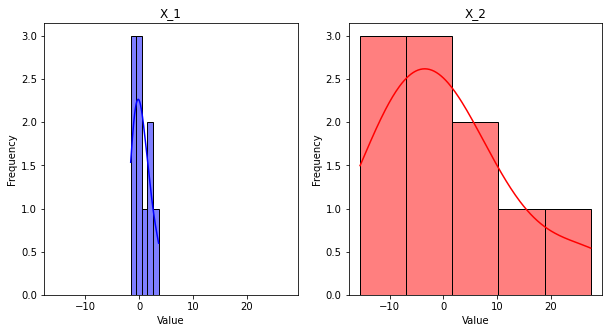

100 samples:


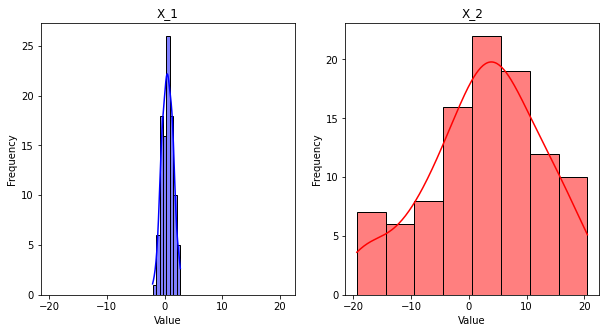

1000 samples:


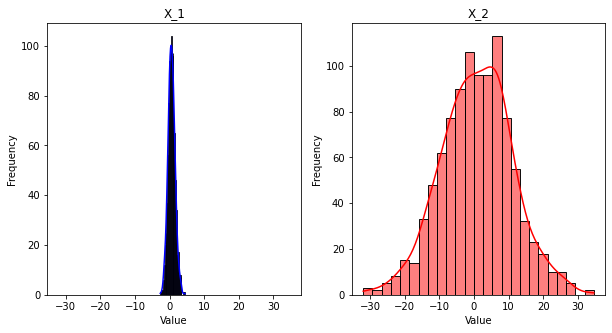

10000 samples:


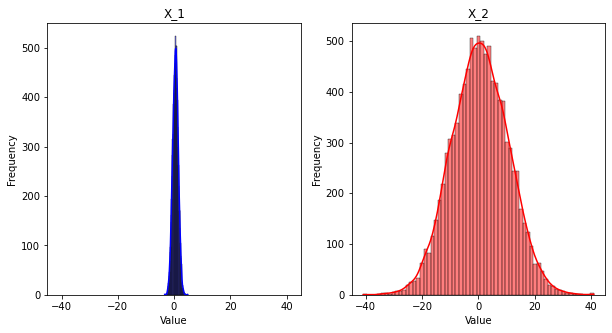

In [7]:
# define a function to generate and plot a random dataset
def plot_random_data(n_samples, colors=['b', 'r']):
    """
    Generates n_samples random data from a distribution and 
    plots each dimension in a separate plot.
    
    Args:
    n_samples: Number of samples to be generated. 
    colors (optional): The colors for the different plots.
    """
    # generate random dataset
    mean = [0.5, 0.5]
    cov = [[1,0], [0,100]]

    X = np.random.multivariate_normal(mean, cov, size=n_samples)

    # initialize a 2x1 figure for plotting
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

    # plot histogram of X_1 on the left
    sns.histplot(X[:, 0], kde=True, color=colors[0], ax=ax1)
    ax1.set_title('X_1')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')

    # plot histogram of X_2 on the right
    sns.histplot(X[:, 1], kde=True, color=colors[1], ax=ax2)
    ax2.set_title('X_2')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')

    # display the plot
    plt.show()

    # TODO: modify this function so that you can specify the mean and variance of each dimension!
    # TODO: modify this function so that you can specify the number of dimensions to use!

# test the function on several dataset sizes
N_values = [10, 100, 1000, 10000]

for N in N_values:
    print('%d samples:' % (N))
    plot_random_data(N)

Notice how the histograms look more like bell curves as the sample size increases. In fact, most machine learning algorithms perform better when there is a sufficiently large amount of data. Having plenty of clean data helps prevent the algorithm from being influenced by outliers and noise in general.

## Plotting Multivariate Data

So far we've visualized _univariate_ (1-dimensional) data, but now let's visualize the entire dataset. We're going to use another function from `seaborn` called `jointplot` to visualize _bivariate_ (2-dimensional) data.

In [8]:
# generate a 2-D dataset
X = random_data(10000)

# create a pandas dataframe with the data and column names
df = pd.DataFrame(X, columns=['X_1', 'X_2'])

# show the dataframe
df

,X_1,X_2
0,-0.206422,-5.810525
1,0.922153,23.146923
2,1.970409,-13.173876
3,-0.720424,14.758570
4,-0.139514,-2.871635
...,...,...
9995,0.939553,-2.417537
9996,0.497118,0.417686
9997,-0.518978,-2.416580
9998,-1.210227,19.561459


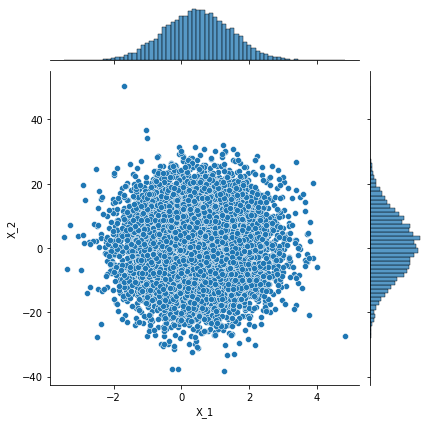

In [9]:
# plot the dataset with seaborn
sns.jointplot(x='X_1', y='X_2', data=df, kind='scatter')
plt.show()

# TODO: try other options for kind ('kde', 'hex', etc.)

This looks cool! We essentially just collapsed the two plots from before into one. The `jointplot` function actually plots three things: the scatter plot, and two histograms for each of the individual features. We also introduced something called a `DataFrame`, a class from the `pandas` library which allows us to package our data with row/column names into a single object. This way we can name the features in our dataset, for example.

## The Iris Dataset

### Basic Usage

Now that we've seen how to generate and visualize random data, let's move on to the famous Iris dataset. Widely considered to be the "Hello World" for datasets, the Iris dataset was created in the early 1900's by the British statistician and biologist Ronald Fisher. This dataset has four features, which correspond to different measurements of an Iris flower, and 150 samples, which correspond to individual flowers. The dataset also has __labels__ or __targets__ associated with the data; that is, each sample is labeled according to its species.

In [12]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# show dataset shape
print('Iris data: (%d, %d)' % iris.data.shape)
print('Iris targets: (%d,)' % iris.target.shape)

# show feature names
print('Feature names: ', iris.feature_names)

# show label names
print('Label names: ', iris.target_names)

Iris data: (150, 4)
Iris targets: (150,)
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label names:  ['setosa' 'versicolor' 'virginica']


As we can see, the __shape__ of the data denotes the number of samples and features, respectively, in the data. We can think of this dataset as an Excel spreadsheet with 150 rows and 4 columns of values, as well as an extra column for the labels. Even the smallest machine learning systems typically use datasets with thousands of samples (if not more) and any number of features depending on the application. Using the tools we've developed so far, we can at least visualize any 2 dimensions of a dataset.

Now, let's load just a slice of the dataset and see what it looks like. As before we'll write code for a specific example and then we'll put it into a function so that we can repeat it.

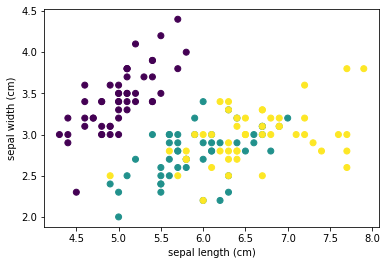

In [13]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# plot the first two features
x = iris.data[:, 0]
y = iris.data[:, 1]

plt.scatter(x, y, c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# TODO: plot the 1st and 3rd features instead

One cool feature of `plt.scatter()` is that instead of using a single color (`c='b'`) you can provide a list of labels (`c=iris.target`) and matplotlib will automatically color each data point according to its label. In this case, matplotlib picked three colors for the three species in the Iris dataset.

As you can see, the distribution of this data is much more... interesting... than that of the random data from before. In reality, most real-world data is much more complex, which makes plots like these all the more important for understanding our data and using the right machine learning algorithms. This plot, for example, shows us that there seems to be two clusters of data above and below, and that we could probably draw a straight line to separate the two clusters. A dataset with this property is called _linearly separable_ since it can be cleanly separated into groups by one or more straight lines.

However, adding color shows us that while one of the species is separated pretty well, the other two species are quite mangled together. What does this mean for us when designing a machine learning system for this data? It means that for whatever task we try to do with this data, such as classification or clustering, any machine learning algorithm we use will probably have more difficulty telling these two species apart.

### Working with Dataframes

Let's take a brief detour to go a bit deeper with `pandas` dataframes. Like we said before, a dataframe is essentially a Numpy array with row names and column names, which we can use to package data, labels, sample names (if applicable), and feature names into a single object. We can manipulate dataframes in many powerful ways using Python's array indexing syntax, and there are a couple of minute differences between dataframes and Numpy arrays.

First, let's create a dataframe for the Iris dataset.

In [14]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# initialize Numpy arrays for data and labels
X = iris.data
y = iris.target

# initialize dataframe
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(iris.feature_names, ['target']))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


The main difference between a Numpy array and a pandas Dataframe is the use of the indexing brackets (`[]`). With a Numpy array, the index is a row number and returns a row:

In [17]:
X[4]

array([5. , 3.6, 1.4, 0.2])

But with a pandas Dataframe, the index is actually a column name and returns a column:

In [19]:
df['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

But you can still use a dataframe like a Numpy array if you need to:

In [23]:
df.iloc[1, 0:2]

sepal length (cm)    4.9
sepal width (cm)     3.0
Name: 1, dtype: float64

In [24]:
df.iloc[0, :].values

array([5.1, 3.5, 1.4, 0.2, 0. ])

Now the real power in a dataframe is the ability to select columns and filter by columns. Here are some examples:

In [27]:
# select only the versicolor samples
print(iris.target_names)

# 'versicolor' is second in the list, so the numerical value is 1
df[df['target'] == 0]

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [29]:
# select the first column of the versicolor samples
df[df['target'] == 1]['sepal width (cm)']

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), dtype: float64

In [30]:
# select multiple columns
df[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Conditional Distributions

Building off of the previous section where we selected just the Iris samples that belong to a particular class, another basic visualization that we can do is to separate the data by class to see how the distributions vary for each class. In other words, we will visualize the __conditional distribution__ for each class in the Iris dataset. To do this we'll use the `FacetGrid` class in `seaborn`:

In [32]:
iris = sns.load_dataset('iris')

iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

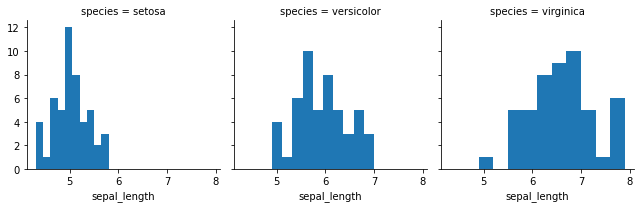

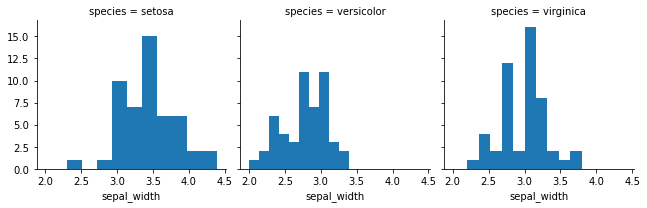

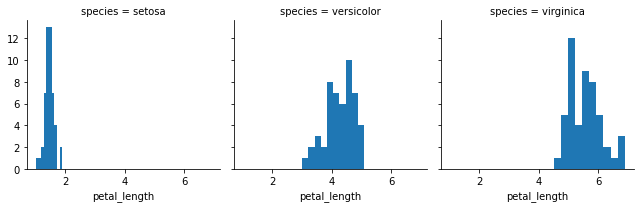

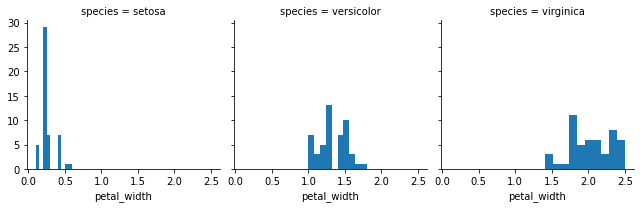

In [33]:
# load the Iris dataset (from seaborn)
iris = sns.load_dataset('iris')

# plot a FacetGrid for each feature
features = iris.columns[:-1]

for feature in features:
    g = sns.FacetGrid(iris, col='species', margin_titles=True)
    g.map(plt.hist, feature)

### Pairwise Scatter Plots

Now, let's write a function that will allow us to plot any two features against each other:

In [34]:
# load the Iris dataset (from sklearn again)
iris = sklearn.datasets.load_iris()

def plot_iris_2d(iris, columns=[0, 1]):
    """
    Plots the Iris dataset with given list of column indices.
    Only the first two column indices are used.
    
    Args:
    iris: Iris dataset loaded from sklearn
    columns: The column indices. By default it'll plot the first and second features.
    """

    # extract x and y axes
    x, y = iris.data[:, columns[0]], iris.data[:, columns[1]]

    # plot x and y
    plt.scatter(x, y, c=iris.target)
    plt.xlabel(iris.feature_names[columns[0]])
    plt.ylabel(iris.feature_names[columns[1]])
    plt.show()

    # TODO: add a legend to the scatter plot

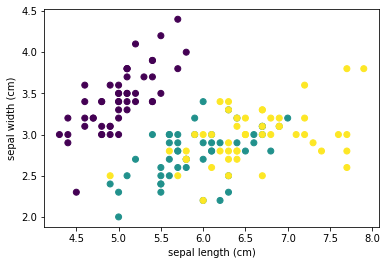

In [35]:
plot_iris_2d(iris)

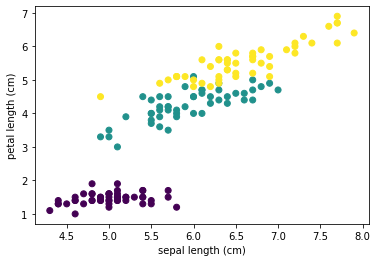

In [36]:
plot_iris_2d(iris, [0, 2])

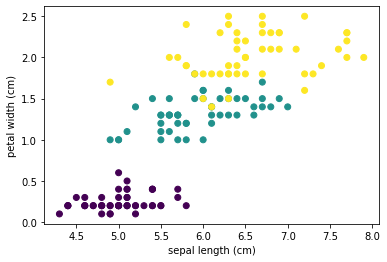

In [37]:
plot_iris_2d(iris, [0, 3])

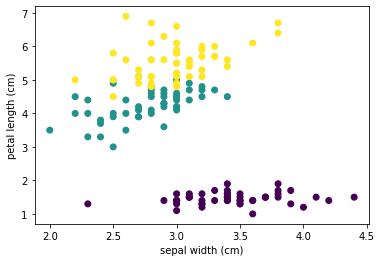

In [38]:
plot_iris_2d(iris, [1, 2])

It looks like there are a lot of "angles" from which we can view the Iris dataset, but no single plot provides a complete view. However, `seaborn` has another supercharged plotting feature that is perfect for this kind of dataset, called `PairGrid`:

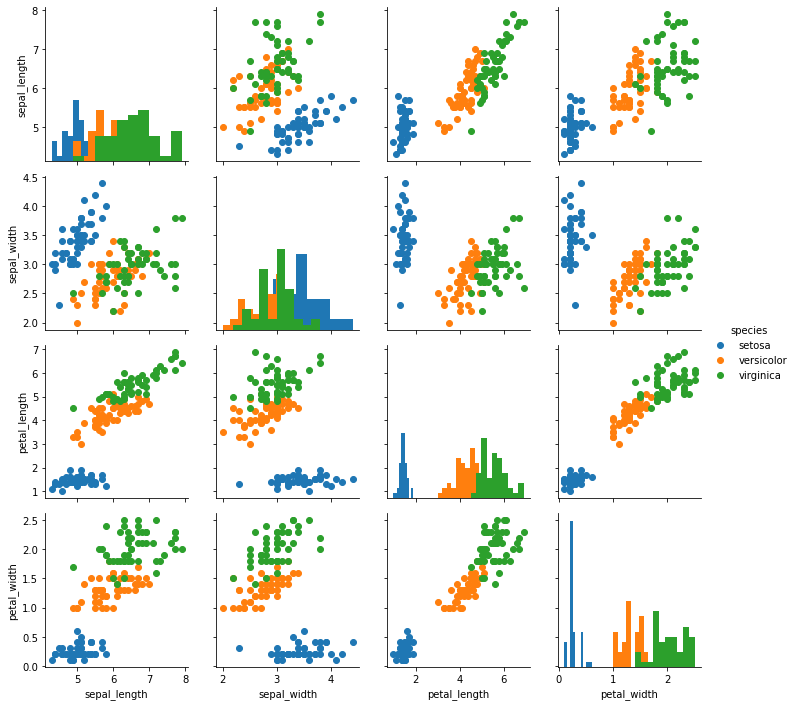

In [40]:
# load the Iris dataset (from seaborn)
iris = sns.load_dataset('iris')

# plot PairGrid showing 1-D histograms and 2-D scatter plots
g = sns.PairGrid(iris, hue='species')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

# TODO: change the lower half of the PairGrid to KDE plots (see sns.kdeplot)

As we can see, `PairGrid` is _really_ powerful because it essentially allows us to see a lot of angles all at once. It's also very configurable; we can "map" the diagonal, upper, and lower halves each to a separate plotting function, and in this case we can color the data by label and add a legend with little effort. The only downside is that `PairGrid` does not scale well to large datasets; as you increase the number of features (the Iris dataset only has four), the number of plots increases rapidly. You can still use `PairGrid` with a large dataset by selecting only a few features from the dataset.

To learn more about what all seaborn can do, check out the [examples gallery](http://seaborn.pydata.org/examples/) and the API docs on the seaborn website.

Let's look again at this issue of separability. It's clear that these two species (which we can identify as `versicolor` and `virginica` thanks to the legend) are stuck together, and any machine learning algorithm we throw at the data will have a hard time distinguishing these two. How can we deal with this problem? The primary way to make data easier to separate is to __add more features__; in other words, add a third or fourth axis along which we might be able to separate the two classes. Now we can't go back to 1936 and tell Ronald Fisher to add more types of measurements, but remember that __we're only looking at two dimensions at a time__. For any given scatter plot above there are two dimensions being excluded, which means that `versicolor` and `virginica` may in fact be separable if we just use the entire dataset instead of only two dimensions. We will revisit this question later when we begin to look at machine learning algorithms.

### Contingency Tables

The four features in the Iris dataset are examples of __numerical__ variables, because they consist of continuous values. A scatter plot is a good way to compare two numerical variables, to see if they are related to each other. But the species label for Iris is a __categorical__ variable, because it consists of a few discrete values, or categories. So what if we want to compare two categorical variables?

To answer this, let's load a dataset that has more categorical data for us to use. How about the Titanic dataset:

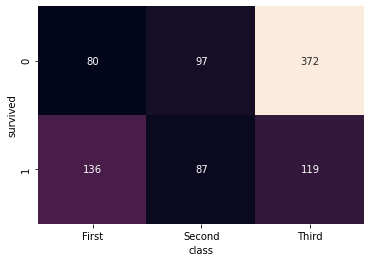

In [41]:
titanic = sns.load_dataset('titanic')

# select two categorical variables
x = titanic['class']
y = titanic['survived']

# convert categorical data to integers
x_values = sorted(list(set(x)))
y_values = sorted(list(set(y)))
x = [x_values.index(x_i) for x_i in x]
y = [y_values.index(y_i) for y_i in y]

# create contingency table
ct = pd.DataFrame(np.zeros((len(y_values), len(x_values))), index=y_values, columns=x_values, dtype=np.int32)

for x_i, y_i in zip(x, y):
    ct.iloc[y_i, x_i] += 1

sns.heatmap(ct, annot=True, fmt='d', cbar=False, square=True)
plt.xlabel('class')
plt.ylabel('survived')
plt.show()

Now we can see the relationship between class and survival rate of the Titanic passengers. Not very surprising.

So now you have a toolbox of different visualizations based on the number and type of variables that you want to look at:
- __one numerical variable__: histogram
- __one categorical variable__: bar plot
- __two numerical variables__: scatter plot
- __two categorical variables__: contingency table
- __one numerical, one categorical variable__: bar plot, facet grid

## Loading Data from the Filesystem

It's easy to load data on-demand from scikit-learn or seaborn, but eventually you'll need to know how to load real data from the filesystem. Here we'll show you quickly how to load two datasets: a CSV file and an image dataset.

### Structured Data

The Iris dataset is a good example of __structured data__, which is essentially any type of data that can be represented easily as a table. Structured data can be stored in an Excel spreadsheet, or a relational database, or a __comma-separated values (CSV)__ file. A CSV file is like a spreadsheet -- each row is on a line, and each column is separated by a comma. In fact, you can load CSV files directly into Excel and view them. In Python, we will use the `read_csv` function in pandas to load CSV files. Here's an example where we load the Iris dataset directly from the filesystem:

In [42]:
# download the CSV file from the Internet
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
!ls

'wget' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
# # if your CSV file doesn't provide column names, you can provide them yourself
# names = [
#     'sepal length (cm)',
#     'sepal width (cm)',
#     'petal length (cm)',
#     'petal width (cm)',
#     'target'
# ]

# # we'll save them to a file and then load them back so you can see what it looks like
# np.savetxt('iris.names', names, fmt='%s')

# names = np.loadtxt('iris.names', dtype=str, delimiter=',')

# iris = pd.read_csv('iris.data', header=None, names=names)

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [49]:
# separate the dataset into data and labels
X = iris.iloc[:, :]
y = iris['species']

print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virgi

### Unstructured Data

Now that you've seen an example of structured data, __unstructured data__ is essentially everything else -- images, video, audio, 3D objects, etc -- if it can't fit in a table, it's probably unstructured data. So for this example let's focus on image data

Image data is a bit more complicated to manage. Whereas structured data is typically stored in a single CSV file, even a large file, we typically store images in individual files so that we can view them easily. We can still load an image dataset into a single numpy array, but we'll need to interact with the file system a bit more. In this example we'll use the [Digits dataset](https://scikit-learn.org/stable/datasets/index.html#digits-dataset) from `sklearn`. Since the dataset comes pre-packaged in a numpy array, we'll save the data as individual images and then load it back, so that you see both ways.

In [50]:
# load the digits dataset from sklearn
digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target
classes = digits.target_names

# convert data to uint8
X = X.astype(np.uint8)

# reshape data to be 8x8
X = X.reshape(X.shape[0], 8, 8)

# print information about dataset
print('X shape:', X.shape)
print('y shape:', y.shape)
print('classes:', classes)

X shape: (1797, 8, 8)
y shape: (1797,)
classes: [0 1 2 3 4 5 6 7 8 9]


In [51]:
# remove previous directory tree
!rm -rf digits

# create directory tree for digits dataset
os.mkdir('digits')

for c in classes:
    os.mkdir('digits/%s' % c)

# save each image to a pgm file in class sub-directory
for i in range(len(X)):
    fname = 'digits/%s/%04d.pgm' % (classes[y[i]], i)
    skimage.io.imsave(fname, X[i])

'rm' is not recognized as an internal or external command,
operable program or batch file.


You should now have the digits dataset in a directory called "digits" with the following directory structure:
```
digits/
    0/
        0000.pgm
        ...
    1/
    2/
    ...
    9/
```

List the directory to see for yourself:

In [52]:
!ls -lR digits

'ls' is not recognized as an internal or external command,
operable program or batch file.


We can also count the total number of images in the dataset:

In [53]:
!ls digits/**/* | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


Organizing images by class is one of the most common ways to store an image dataset. That way you can infer the label for each image directory from the it's parent directory. Note however that your image dataset may have multiple labels (for example, face images labelled by person and other attributes such as age, gender, emotion, etc), so you must make sure to group images by the label type that you are using.

Now that we have a good example dataset in the filesystem, let's load it back in as if it were a new dataset. The code is actually quite similar to what we just did.

In [54]:
# infer class names from the sub-directory names
classes = os.listdir('digits')

# initialize empty data array and label array
n_samples = 1797
X = np.empty((n_samples, 8, 8), dtype=np.uint8)
y = np.empty((n_samples,), dtype=np.int64)

# iterate through sub-directories
i = 0

for k, class_name in enumerate(classes):
    # get list of images in class k
    filenames = os.listdir('digits/%s' % class_name)
    filenames = ['digits/%s/%s' % (class_name, f) for f in filenames]
    
    # load each image into numpy array
    for fname in filenames:
        X[i] = skimage.io.imread(fname)
        y[i] = k
        i += 1

print(X)
print(y)

# TODO: can you write a function to load an arbitrary image dataset? some considerations
# - it should work for any directory name
# - it should determine n_samples and the image size automatically (or be given them as parameters)

[[[ 0  0  5 ...  1  0  0]
  [ 0  0 13 ... 15  5  0]
  [ 0  3 15 ... 11  8  0]
  ...
  [ 0  4 11 ... 12  7  0]
  [ 0  2 14 ... 12  0  0]
  [ 0  0  6 ...  0  0  0]]

 [[ 0  0  1 ... 11  0  0]
  [ 0  0 11 ... 14  6  0]
  [ 0  2 16 ...  9  9  0]
  ...
  [ 0  1 16 ... 11  3  0]
  [ 0  0 12 ... 10  0  0]
  [ 0  0  1 ...  3  0  0]]

 [[ 0  0  3 ...  7  0  0]
  [ 0  0 11 ... 16  2  0]
  [ 0  4 16 ... 14  2  0]
  ...
  [ 0  0 15 ... 13  6  0]
  [ 0  0  9 ... 14  1  0]
  [ 0  0  2 ...  4  0  0]]

 ...

 [[ 0  0  4 ...  6  0  0]
  [ 0  5 16 ... 16  0  0]
  [ 0  5 16 ... 16  3  0]
  ...
  [ 0  0  0 ... 16  8  0]
  [ 0  0  1 ... 16  6  0]
  [ 0  0  4 ...  9  0  0]]

 [[ 0  0  4 ...  6  0  0]
  [ 0  1 16 ... 16  3  0]
  [ 0  4 16 ... 16  4  0]
  ...
  [ 0  0  0 ... 15  5  0]
  [ 0  0  5 ... 16  4  0]
  [ 0  0  2 ...  9  0  0]]

 [[ 0  0  2 ...  0  0  0]
  [ 0  0 14 ... 15  1  0]
  [ 0  4 16 ... 16  7  0]
  ...
  [ 0  0  0 ... 16  2  0]
  [ 0  0  4 ... 16  2  0]
  [ 0  0  5 ... 12  0  0]]]
[0 0 0 ...

If we compare the data that we loaded to the original data from `sklearn`, it won't match exactly because our data is ordered by class. So it's the same data but ordered differently:

In [55]:
print(X.mean() - digits.data.mean())
print(y.mean() - digits.target.mean())

0.0
0.0


## Assignment: Understand Your Data

The Iris dataset is one of the simplest datasets around, so it's really easy to understand from just a few visualizations. To practice your data-wrangling skills, pick one of the toy datasets from [scikit-learn](http://scikit-learn.org/stable/datasets/index.html#toy-datasets) or [seaborn](http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset) and create some visualizations that help you understand the data. Some good visualizations to get started include:
- heatmaps
- histograms / violinplots / kde plots
- bar plots
- pairwise scatter plots
- regression plots

`seaborn` provides all of these methods and more, and the [examples gallery](http://seaborn.pydata.org/examples/) is a great way to learn about them. Keep in mind that each type of visualization can be used in multiple ways, and some visualizations are more useful than others for a particular dataset.

As you examine your dataset of choice, here are some basic questions to ask yourself:
- How many __samples__ are in the dataset? How many __features__? How many __labels__?
- Can you tell the difference between the features and the labels?
- What is the __mean__ and __variance__ of each feature? More broadly, which features are "spread out" more?
- Are any of the features __correlated__ with each other, or otherwise related in some interesting way?
- Is the data __separable__? That is, is it easy to visually separate the data by labels?

If you can visualize and understand one of these toy datasets, great! Try some of the other datasets! Every dataset is unique and will probably teach you something new about how to understand data through visualization.

In [56]:
# TODO: load and visualize another toy dataset

## Epilogue: Brave New World

This notebook should give you the basic skills you need to be able to load and visualize datasets. Once you've acquired some experience with one of the toy datasets, it's time to step out into the real world. Check out the [Datasets](https://cufctl.github.io/creative-inquiry/skills/datasets.html) page on the creative inquiry website for links to various dataset repositories, as well as instructions for downloading datasets from Kaggle.

As you browse these repositories, think about the kinds of datasets that would interest you. Don't limit yourself to school-related topics -- you can find data on just about anything! Look for datasets related to your hobbies, your passions, or a question that has always bothered you... there might be a dataset out there just for you. Make it fun! Find a dataset that you will enjoy working with. Whatever you settle on over the next few weeks will be the basis for your semester project.